In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import cv2
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('yes//y0.jpg')
img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

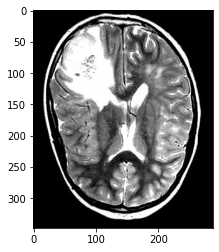

In [ ]:
plt.imshow(img)

In [2]:
# Wavelet Transform

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [3]:
class_dict = {'yes':1,'no':0}

In [4]:
import os
d = os.listdir()
path = []
path.append(os.listdir('.\\Kaggle\\yes'))
path.append(os.listdir('.\\Kaggle\\no'))
path = {'yes':path[0],'no':path[1]}

In [5]:
x,y = [],[]
s = r"C:\Users\Sneh\Documents\Project\Brain Tumor Detection\Kaggle"
classification_dict = {'yes':1,'no':0}
for i in path.keys():
    for j in path[i]:
        img = cv2.imread(s + '\\' + i + '\\' + j)
        scalled_raw_img = cv2.resize(img, (64, 64))
        img_har = w2d(img,'haar',6)
        scalled_img_har = cv2.resize(img_har, (64, 64))
        combined_img = np.vstack((scalled_raw_img.reshape(64*64*3,1),scalled_img_har.reshape(64*64,1)))
        x.append(combined_img)
        y.append(classification_dict[i])  


In [6]:
x.shape

AttributeError: 'list' object has no attribute 'shape'

In [7]:
x = np.array(x).reshape(len(x),16384).astype(float)
x.shape

(3000, 16384)

In [24]:
import sys
sys.getsizeof(x)

393216128

In [26]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2 ,random_state=0)

# pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
# pipe.fit(X_train, y_train)
# pipe.score(X_test, y_test)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2 ,random_state=0)
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

from sklearn import metrics
# print(metrics.accuracy_score(y_train,svc.predict(X_train)))
# print(metrics.precision_score(y_train,svc.predict(X_train)))
# print(metrics.recall_score(y_train,svc.predict(X_train)))
print('Kernel = Linear')
print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

Kernel = Linear
Accuracy 0.9555555555555556
Precision 0.9557344064386318
Recall 0.9634888438133874


In [28]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)

from sklearn import metrics
print('Kernel = Poly')
print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

Kernel = Poly
Accuracy 0.9816666666666667
Precision 0.9853801169590644
Recall 0.9825072886297376


In [19]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

from sklearn import metrics
print('Kernel = RBF')
print('Accuracy',metrics.accuracy_score(y_test,svc.predict(X_test)))
print('Precision',metrics.precision_score(y_test,svc.predict(X_test)))
print('Recall',metrics.recall_score(y_test,svc.predict(X_test)))

Kernel = RBF
Accuracy 0.9644444444444444
Precision 0.9619238476953907
Recall 0.973630831643002


In [29]:
import joblib

In [9]:
model = joblib.load('svc_model.pkl')

In [31]:
joblib.dump(svc,'svc_model.pkl')

['svc_model.pkl']